example systems

$$ m\ddot{x}+c\dot{x}+kx=u\left(t\right) $$

In [1]:
import numpy

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [16]:
# %load pyRK4.py
"""
Created on Mon Mar 17 17:20:35 2014

@author: tai
- set the convention that output argument is always the last for fu,fdx,fy
 - fu,fy syntax changed
"""

def stateDerivative(t,x,u,fu,fdx,px,pu,dx):   
    fu(t,x,pu,u)
    fdx(t,x,u,px,dx)


def RK4(fdx,fu,fy,x0,tv,xv,uv,yv,px,pu,py,nx,nu,ny,nt):
    """
    fdx     :      state derivative function
                   fdx(t,x,u,px,dx)
    fu      :      input function
    fy      :      output function
    x0      :      initial state vector
    tv      :      time vectors to obtain solution at
    xv      :      storage for solution states
    yv      :      storage for solution outputs
    px      :      extra argumens(parameters) for state derivative fdx
    pu      :      extra argumens(parameters) for output function fy
    py      :      extran arguments(parameters) for output function fy    
    """

    a = numpy.array([ 
            [0.0, 0.0, 0.0, 0.0] ,  
            [1.0/2.0,0.0,0.0,0.0] , 
            [0.0,1.0/2.0,0.0,0.0] , 
            [0.0,0.0,1.0,0.0] ], numpy.float64)
    b = numpy.array([ 1.0/6.0, 1.0/3.0, 1.0/3.0, 1.0/6.0 ], numpy.float64)
    c = numpy.array([ 0.0, 1.0/2.0, 1.0/2.0, 1.0 ], numpy.float64)
    
    x = numpy.zeros_like(x0)
    u = numpy.empty((nu,), x0.dtype)
    y = numpy.empty((ny,), x0.dtype)
    k = numpy.zeros((nx,4), x0.dtype)
    
    print "u.size", u.shape
    print "x.size", x.shape
    print "y.size", y.shape
    
    """
    if False:
        xv = numpy.zeros((nx,nt), x0.dtype)
        uv = numpy.zeros((nu,nt), x0.dtype)
        yv = numpy.zeros((ny,nt), x0.dtype)
    else:
        xv.resize((nx,nt))
        uv.resize((nu,nt))
        yv.resize((ny,nt))
    """

    t = tv[0]
    print "x, x0 ids before = ",id(x),id(x0)    
    x = x0*1.0  # 
    print "x, x0 ids after  = ",id(x),id(x0)

    fu(t,x,pu,u)
    fdx(t,x,u,px,dx)
    fy(t,x,dx,u,px,pu,py,y)

    print "xv.shape",xv.shape
    xv[:,0] = x
    uv[:,0] = u
    yv[:,0] = y

    for m in range(nt-1):
        dt = tv[m+1]-tv[m]

        deltax = 0    # ! better to use vector of size nx??
        for i in range(4):
            xstage = x*1.0
            for j in range(i-1):
                xstage = xstage+dt*a[i,j]*k[:,j]
            # def stateDerivative(t,x,u,fu,fdx,px,pu,dx):   
            stateDerivative(t+c[i]*dt, xstage, u, fu, fdx, px, pu, k[:,i])
            deltax = deltax + dt*b[i]*k[:,i]
   
        x = x + deltax
        t = t + dt
        
        #print "u.size", u.shape
        #print "x.size", x.shape
        #print "y.size", y.shape        
        fu(t,x,pu,u)
        fdx(t,x,u,px,dx)
        fy(t,x,dx,u,px,pu,py,y)

        xv[:,1+m] = x
        uv[:,1+m] = u
        yv[:,1+m] = y

In [17]:
def fdx1(t,x,u,px,dx):
    m = px[0]
    c = px[1]
    k = px[2]
    dx[0] = x[1]
    dx[1] = (u[0]-c*x[1]-k*x[0])/m
    
    
def fu1(t,x,pu,u):
    freq = pu[0]
    u = numpy.sin(freq*t)
    
def fy1(t,x,dx,u,px,pu,py,y):
    y[0] = x[0]   # position
    y[1] = x[1]   # velocity
    y[2] = dx[1]  # acceleration
    y[3] = 0.5*px[0]*x[1]**2  # kinetic energy
    

# check column assignment works or not 

In [18]:
k = numpy.zeros((2,4), numpy.float64)
dx = numpy.zeros((2,), numpy.float64)

In [19]:
fdx1(0., [0.1, 0.2], [1.], [1., 2., 3.], dx)
fdx1(0., [0.1, 0.2], [1.], [1., 2., 3.], k[:,0])

In [20]:
print dx
print k

[ 0.2  0.3]
[[ 0.2  0.   0.   0. ]
 [ 0.3  0.   0.   0. ]]


# test integrator on SMD

In [21]:
tv = numpy.arange(0,10,0.1, numpy.float64)
nt = len(tv)
nx = 2
nu = 1
ny = 4
px = numpy.array([1., .1, 3.], numpy.float64)
pu = numpy.array([0.2], numpy.float64)
py = numpy.array([], numpy.float64)
x0 = numpy.array([1., 0.5], numpy.float64)
xv = numpy.empty([nx,nt], numpy.float64)
yv = numpy.empty([ny,nt], numpy.float64)
uv = numpy.empty([nu,nt], numpy.float64)
RK4(fdx1,fu1,fy1,x0,tv,xv,uv,yv,px,pu,py,nx,nu,ny,nt)

u.size (1,)
x.size (2,)
y.size (4,)
x, x0 ids before =  140503611541584 140503573600816
x, x0 ids after  =  140503571185872 140503573600816
xv.shape (2, 100)


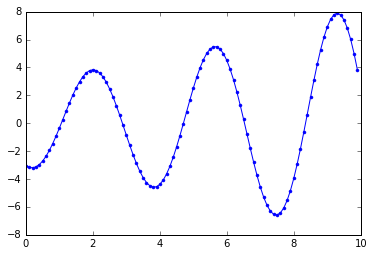

In [23]:
plt.plot(tv,yv[2,:],'.-')

# symbolic solution

In [24]:
import sympy

In [30]:
m,c,k,x,t,u = sympy.symbols('m c k x t u')

In [53]:
eqs = [sympy.Eq(m*x(t).diff(t,t)+c*x(t).diff(t)+k*x(t),u(t)),x(0)=1,
       x(t).diff(t).subs({t:0.5}),
       x(t).diff(t).subs({t:0})=0.5]

SyntaxError: invalid syntax (<ipython-input-53-a22f27d0ad2b>, line 1)

In [52]:
eqs

[Eq(c*Derivative(x(t), t) + k*x(t) + m*Derivative(x(t), t, t), u(t)),
 False,
 Subs(Derivative(x(t), t), (t,), (0.5,)),
 False]

In [49]:
x(t).subs({t:0.5})

x(0.5)

In [38]:
sol=sympy.dsolve(eqs,x(t))

In [39]:
sol

Eq(x(t), C1*exp(t*(-c - sqrt(c**2 - 4*k*m))/(2*m)) + C2*exp(t*(-c + sqrt(c**2 - 4*k*m))/(2*m)) - exp(t*(-c - sqrt(c**2 - 4*k*m))/(2*m))*Integral(u(t)*exp(c*t/(2*m))*exp(t*sqrt(c**2 - 4*k*m)/(2*m)), t)/sqrt(c**2 - 4*k*m) + exp(t*(-c + sqrt(c**2 - 4*k*m))/(2*m))*Integral(u(t)*exp(c*t/(2*m))*exp(-t*sqrt(c**2 - 4*k*m)/(2*m)), t)/sqrt(c**2 - 4*k*m))

In [43]:
sol.subs({c:1,m:1,k:3,u(t):sympy.sin(0.2*t)})

Eq(x(t), C1*exp(t*(-1 - sqrt(11)*I)/2) + C2*exp(t*(-1 + sqrt(11)*I)/2) + sqrt(11)*I*exp(t*(-1 - sqrt(11)*I)/2)*Integral(exp(t/2)*exp(sqrt(11)*I*t/2)*sin(0.2*t), t)/11 - sqrt(11)*I*exp(t*(-1 + sqrt(11)*I)/2)*Integral(exp(t/2)*exp(-sqrt(11)*I*t/2)*sin(0.2*t), t)/11)

In [122]:
xv = numpy.empty([nx,nt], numpy.float64)

In [83]:
xv.shape

(2, 100)

In [86]:
xv = numpy.zeros((nx,nt), numpy.float64)

In [87]:
xv.shape

(2, 100)

In [88]:
xv[:,0] = [1,2]

In [89]:
xv

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0